In [2]:
# Import libraries
import pandas as pd
# Load dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
# View
print(train_df.head())
print(train_df.describe())
print(train_df.info())
print(test_df.head())
print(test_df.describe())
print(test_df.info())

   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]
           date_id           D1           D2           D3           D4

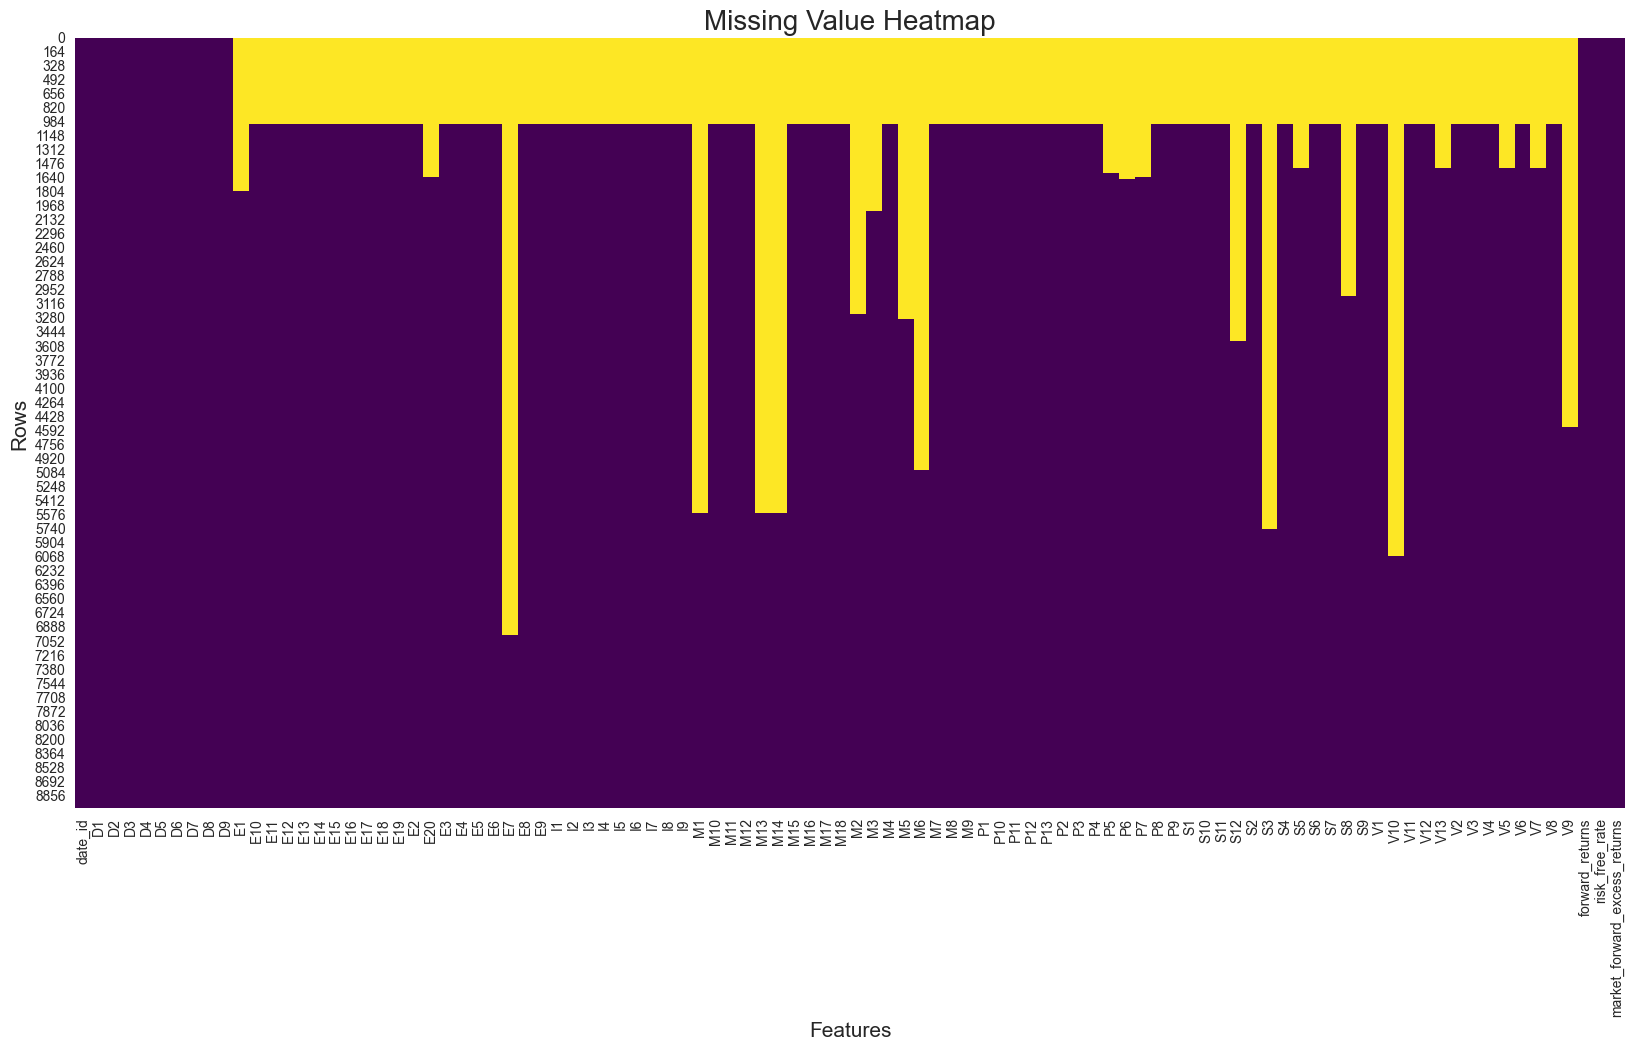

Percentage of missing values per feature:
E7     77.519466
V10    67.285873
S3     63.770857
M1     61.701891
M13    61.624027
M14    61.624027
M6     56.095662
V9     50.489433
S12    39.343715
M5     36.518354
M2     35.784205
S8     33.470523
M3     22.447164
E1     19.844271
P6     18.220245
E20    17.975528
P7     17.975528
P5     17.508343
V5     16.818687
V13    16.807564
dtype: float64


In [3]:
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(train_df.isnull(), cbar=False, cmap = "viridis", ax = ax)

ax.set_title("Missing Value Heatmap", fontsize=20)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Rows", fontsize = 15)

plt.show()

missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

print("Percentage of missing values per feature:")
print(missing_percentage.sort_values(ascending=False).head(20))


## Various Methods to visualize missing data

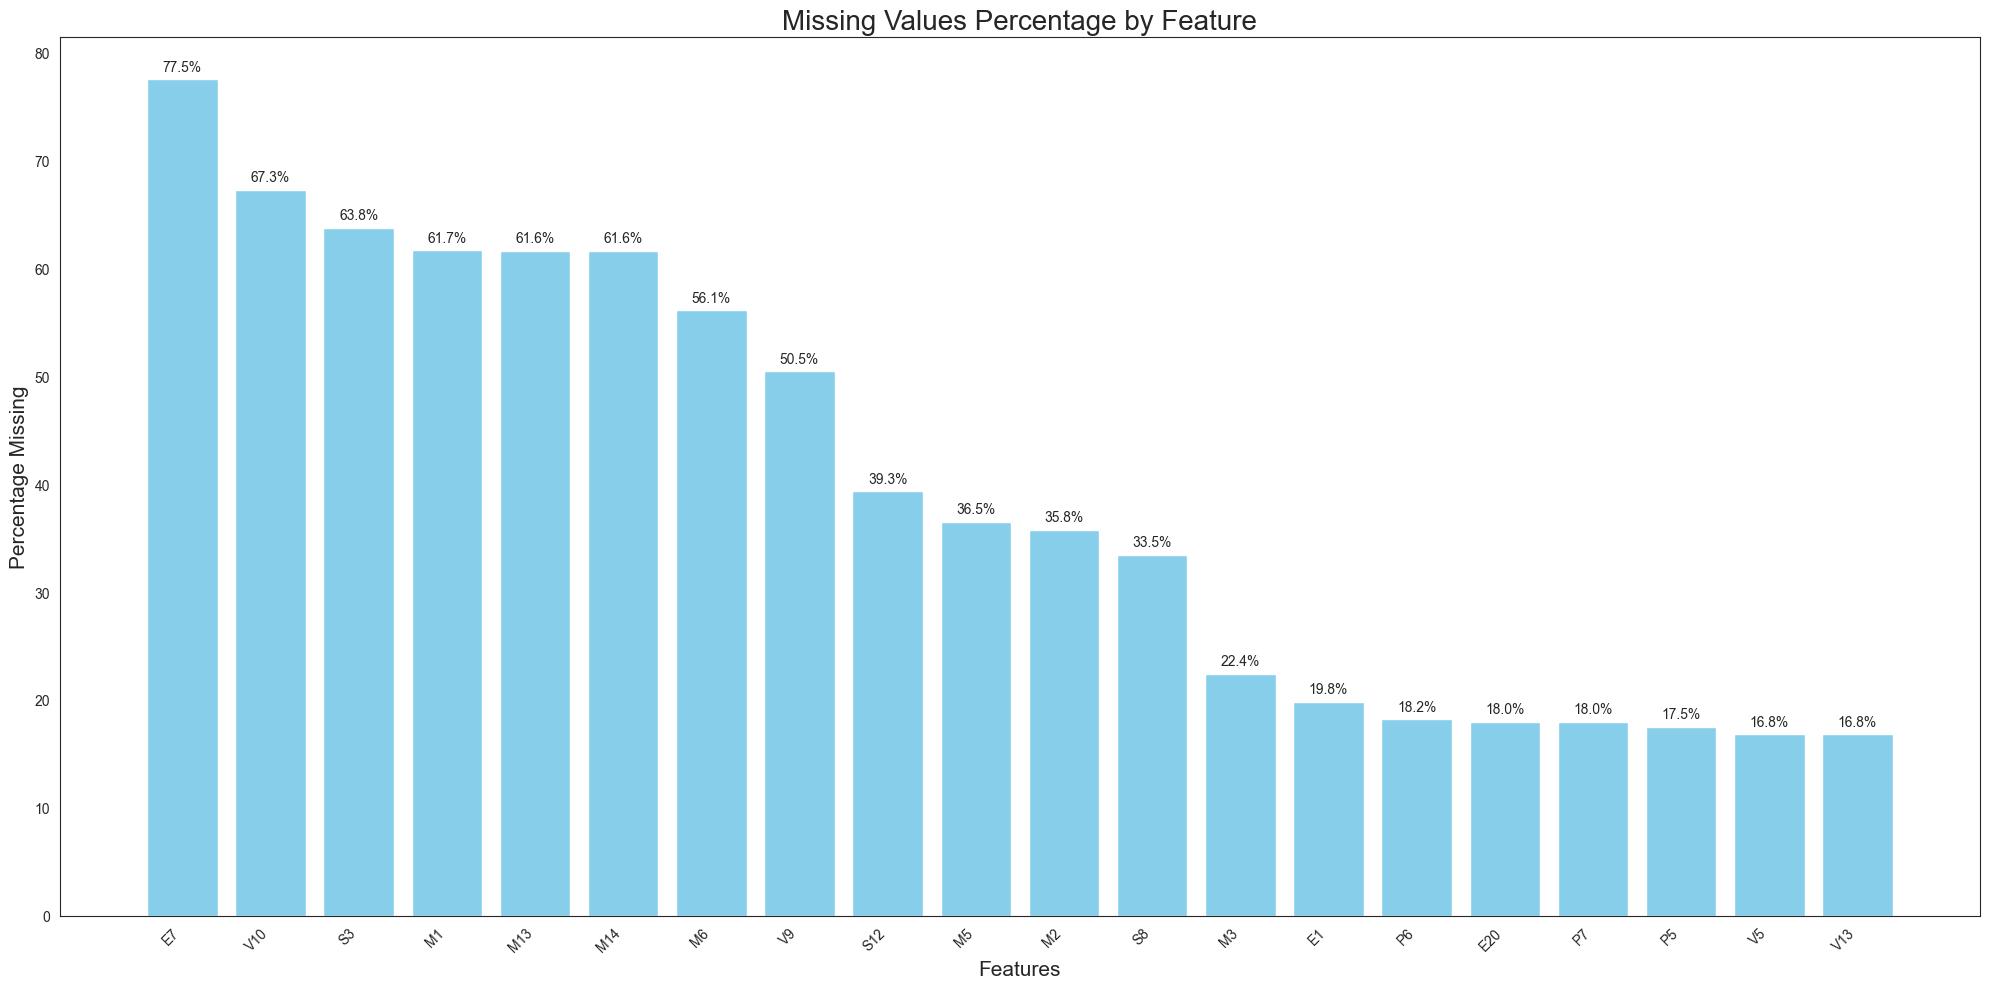

Percentage of missing values per feature:
E7     77.519466
V10    67.285873
S3     63.770857
M1     61.701891
M13    61.624027
M14    61.624027
M6     56.095662
V9     50.489433
S12    39.343715
M5     36.518354
M2     35.784205
S8     33.470523
M3     22.447164
E1     19.844271
P6     18.220245
E20    17.975528
P7     17.975528
P5     17.508343
V5     16.818687
V13    16.807564
dtype: float64


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("white")

# Calculate missing percentages
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

# Plot only top N features with missing values (adjust as needed)
top_missing = missing_percentage[missing_percentage > 0].head(20)

fig, ax = plt.subplots(figsize=(20, 10))

bars = ax.bar(range(len(top_missing)), top_missing.values, color='skyblue')
ax.set_title("Missing Values Percentage by Feature", fontsize=20)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Percentage Missing", fontsize=15)
ax.set_xticks(range(len(top_missing)))
ax.set_xticklabels(top_missing.index, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_missing.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Percentage of missing values per feature:")
print(missing_percentage.head(20))

In [16]:
import polars as pl
from pathlib import Path

# --- Constants ---
DATA_PATH = Path('./')
MISSING_THRESHOLD = 0.5
MAX_TRAIN_ROWS = 1000

# --- Data Loading ---
def load_trainset() -> pl.DataFrame:
    """Loads and preprocesses the training data."""
    df = (
        pl.read_csv(DATA_PATH / "train.csv")
        .rename({'market_forward_excess_returns': 'target'})
        .with_columns(pl.exclude('date_id').cast(pl.Float64, strict=False))
        .filter(pl.col('date_id') >= 37)
        .tail(MAX_TRAIN_ROWS)
    )
    
    # Drop columns with high missing rate
    missing_counts = {col: df[col].is_null().mean() for col in df.columns}
    feature_cols = [
        col for col, miss_rate in missing_counts.items()
        if miss_rate <= MISSING_THRESHOLD and col not in ['date_id', 'target']
    ]
    
    keep_cols = ['date_id', 'target'] + feature_cols
    return df.select(keep_cols)

# --- Execution ---
train_df_filtered = load_trainset()

print("Filtered Training Data Head:")
print(train_df_filtered.head())
print("\nFiltered Training Data Shape:")
print(train_df_filtered.shape)

Filtered Training Data Head:
shape: (5, 98)
┌─────────┬───────────┬─────┬─────┬───┬──────────┬──────────┬─────────────────┬────────────────┐
│ date_id ┆ target    ┆ D1  ┆ D2  ┆ … ┆ V8       ┆ V9       ┆ forward_returns ┆ risk_free_rate │
│ ---     ┆ ---       ┆ --- ┆ --- ┆   ┆ ---      ┆ ---      ┆ ---             ┆ ---            │
│ i64     ┆ f64       ┆ f64 ┆ f64 ┆   ┆ f64      ┆ f64      ┆ f64             ┆ f64            │
╞═════════╪═══════════╪═════╪═════╪═══╪══════════╪══════════╪═════════════════╪════════════════╡
│ 7990    ┆ -0.016983 ┆ 0.0 ┆ 0.0 ┆ … ┆ 0.696098 ┆ 0.461544 ┆ -0.016674       ┆ 0.000001       │
│ 7991    ┆ -0.001253 ┆ 0.0 ┆ 0.0 ┆ … ┆ 0.718915 ┆ 0.901332 ┆ -0.000945       ┆ 9.9206e-7      │
│ 7992    ┆ 0.009447  ┆ 1.0 ┆ 1.0 ┆ … ┆ 0.676918 ┆ 0.772232 ┆ 0.009755        ┆ 7.9365e-7      │
│ 7993    ┆ 0.011842  ┆ 0.0 ┆ 0.0 ┆ … ┆ 0.709656 ┆ 0.436983 ┆ 0.01215         ┆ 9.9206e-7      │
│ 7994    ┆ 0.001339  ┆ 0.0 ┆ 0.0 ┆ … ┆ 0.697751 ┆ 0.204552 ┆ 0.001647        ┆ 9.9

In [17]:
import polars as pl
import logging

# Set up logging for clarity
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def create_features(df: pl.DataFrame, is_train: bool = False, median_values: dict = None) -> (pl.DataFrame, dict):
    """
    Creates derived features and imputes missing values for the dataframe.
    
    Returns the featured dataframe and a dictionary of median values for caching.
    """
    logger.info(f"Starting feature engineering. Initial columns: {df.columns}")

    # --- 1. Derived Feature Creation ---
    expressions = []
    base_features = [col for col in df.columns if any(col.startswith(p) for p in ['D', 'E', 'I', 'M', 'P', 'S', 'V'])]
    
    # Check for required columns before creating expressions
    if all(col in df.columns for col in ['I2', 'I1', 'M11', 'I9', 'I7']):
        expressions.extend([
            (pl.col("I2") - pl.col("I1")).alias("U1"),
            (pl.col("M11") / ((pl.col("I2") + pl.col("I9") + pl.col("I7")) / 3)).alias("U2")
        ])

    if 'V1' in df.columns and 'S1' in df.columns:
        expressions.append((pl.col("V1") * pl.col("S1")).alias("V1_S1_interaction"))
    if 'M11' in df.columns and 'V1' in df.columns:
        expressions.append((pl.col("M11") * pl.col("V1")).alias("M11_V1_interaction"))
    if 'I9' in df.columns and 'S1' in df.columns:
        expressions.append((pl.col("I9") * pl.col("S1")).alias("I9_S1_interaction"))
    
    if expressions:
        df = df.with_columns(expressions)
        logger.info(f"Added derived features: {[e.meta.output_name() for e in expressions]}")

    derived_features = ["U1", "U2", "V1_S1_interaction", "M11_V1_interaction", "I9_S1_interaction"]

    # --- 2. Imputation ---
    # Calculate medians from the training data if not provided
    if is_train and median_values is None:
        median_values = {
            col: df[col].median()
            for col in base_features + derived_features
            if col in df.columns and df[col].is_null().any()
        }
        logger.info(f"Calculated and cached {len(median_values)} median values for imputation.")

    # Create a list of imputation expressions
    impute_expressions = []
    for col in base_features + derived_features:
        if col in df.columns:
            # First, handle time-series specific fills
            if col.startswith('I'):
                df = df.with_columns(pl.col(col).fill_null(strategy="forward").fill_null(strategy="backward"))
            
            # Then, fill any remaining NaNs with the median
            if col in median_values:
                median_val = median_values.get(col, 0.0) # Default to 0.0 if somehow missing
                impute_expressions.append(pl.col(col).fill_null(median_val))

    if impute_expressions:
        df = df.with_columns(impute_expressions)
        logger.info("Applied median imputation to remaining nulls.")

    logger.info(f"Feature engineering complete. Final columns: {df.columns}")
    return df, median_values or {}

# --- Execution ---
# Assumes 'train_df_filtered' is available from the previous cell in the notebook
train_df_featured, median_values_cache = create_features(train_df_filtered, is_train=True)

print("\\n" + "="*50)
print("Training Data Head after Feature Engineering:")
print(train_df_featured.head())
print("\\nFiltered Training Data Shape:")
print(train_df_featured.shape)
print("\\nCached Median Values for Imputation:")
print(median_values_cache)
print("="*50)


2025-09-30 21:12:26,922 - INFO - Starting feature engineering. Initial columns: ['date_id', 'target', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns', 'risk_free_rate']
2025-09-30 21:12:26,926 - INFO - Added derived features: ['U1', 'U2', 'V1_S1_interaction', 'M11_V1_interaction', 'I9_S1_interaction']
2025-09-30 21:12:26,931 - INFO - Calculated and cached 0 median values for imputation.
2025-09-30 21:12:26,932 - INFO - Feature engi

\n==================================================
Training Data Head after Feature Engineering:
shape: (5, 103)
┌─────────┬───────────┬─────┬─────┬───┬──────────┬────────────────┬────────────────┬───────────────┐
│ date_id ┆ target    ┆ D1  ┆ D2  ┆ … ┆ U2       ┆ V1_S1_interact ┆ M11_V1_interac ┆ I9_S1_interac │
│ ---     ┆ ---       ┆ --- ┆ --- ┆   ┆ ---      ┆ ion            ┆ tion           ┆ tion          │
│ i64     ┆ f64       ┆ f64 ┆ f64 ┆   ┆ f64      ┆ ---            ┆ ---            ┆ ---           │
│         ┆           ┆     ┆     ┆   ┆          ┆ f64            ┆ f64            ┆ f64           │
╞═════════╪═══════════╪═════╪═════╪═══╪══════════╪════════════════╪════════════════╪═══════════════╡
│ 7990    ┆ -0.016983 ┆ 0.0 ┆ 0.0 ┆ … ┆ 1.708199 ┆ 3.350341       ┆ -1.039744      ┆ -4.406481     │
│ 7991    ┆ -0.001253 ┆ 0.0 ┆ 0.0 ┆ … ┆ 1.58938  ┆ 3.347308       ┆ -0.965783      ┆ -4.469719     │
│ 7992    ┆ 0.009447  ┆ 1.0 ┆ 1.0 ┆ … ┆ 1.464394 ┆ 3.668135       ┆ -0.966918

In [27]:
import sys
!{sys.executable} -m pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable


In [28]:
!pip install pyarrow
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import xgboost as xgb
import lightgbm as lgb
import time
import pyarrow as pa


# --- Model Training ---

# 1. Define Feature Set
# We'll use all columns created so far, except for the identifier and the target variable.
features = [col for col in train_df_featured.columns if col not in ['date_id', 'target']]

# 2. Prepare Data for Scikit-Learn
X_train_df = train_df_featured.select(features).to_pandas()
y_train_series = train_df_featured['target'].to_pandas()

# Check for any remaining NaNs after our imputation
if X_train_df.isna().any().any():
    raise ValueError(f"NaNs found in training data for columns: {X_train_df.columns[X_train_df.isna().any()].tolist()}")

# 3. Scale Features
# Models like ElasticNet benefit from feature scaling.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)

logger.info(f"Feature scaling complete. Training on {X_train_scaled.shape[1]} features.")

# 4. Train Base Models
start_time = time.time()

# --- ElasticNet ---
enet_params = {'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 1000000}
enet_model = ElasticNet(**enet_params)
enet_model.fit(X_train_scaled, y_train_series)
logger.info(f"ElasticNet model trained.")

# --- XGBoost ---
xgb_params = {'objective': 'reg:squarederror', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'random_state': 42}
xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(X_train_scaled, y_train_series)
logger.info(f"XGBoost model trained.")

# --- LightGBM ---
lgb_params = {'objective': 'regression', 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.03, 'random_state': 42, 'verbose': -1}
lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model.fit(X_train_scaled, y_train_series)
logger.info(f"LightGBM model trained.")

training_time = time.time() - start_time
logger.info(f"Base model training completed in {training_time:.2f} seconds.")

# Display a confirmation
print("\\n" + "="*50)
print("Base Models Trained Successfully:")
print(f" - ElasticNet: {enet_model}")
print(f" - XGBoost: {xgb_model}")
print(f" - LightGBM: {lgb_model}")
print("="*50)


Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: pa.Table requires 'pyarrow' module to be installed